In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("covid_part2.ipynb")

# Final Project: COVID-19 Dataset
## Exploring COVID-19 Data through Modeling
## Due Date: Thursday, December 13th, 11:59 PM
## Collaboration Policy

Data science is a collaborative activity. While you may talk with other groups about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others outside of your group please **include their names** at the top
of your notebook.


## This Assignment

In this final project, we will investigate COVID-19 data over the past year. This data contains information about COVID-19 case counts, mortalities, vaccination rates, and various other metadata that can assist in modeling various aspects of COVID-19.

Through this final project, you will demonstrate your experience with:
* Data cleaning and EDA using Pandas
* Unsupervised and supervised learning techniques
* Visualization


## Goal

Model and analyze the temporal evolution of COVID-19 mortalities or cases using one unsupervised and one supervised technique of your choice. Interpret your models' results through visualizations, and draw insightful conclusions about the modeling of COVID-19 data.

Recall that we studied linear and logistic regression, decision trees, random forests as part of supervised learning (with labels) and clustering, PCA as part of unsupervised learning (without labels). You are free to use any methods that you find suitable to answer the problem at hand.

In [2]:
# Run this cell to set up your notebook
import numpy as np
from geopy import *
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import *
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
import re

cases = pd.read_csv('data/time_series_covid19_confirmed_US.csv') # https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
vaccinations = pd.read_csv('data/people_vaccinated_us_timeline.csv') # https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/people_vaccinated_us_timeline.csv
counties = pd.read_csv('data/co-est2020.csv', encoding='latin-1') # https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/counties/totals/co-est2020.csv
mask_use = pd.read_csv('data/mask-use-by-county.csv') # https://github.com/nytimes/covid-19-data/blob/master/mask-use/mask-use-by-county.csv

<br/><br/><br/>

---

<br/><br/><br/>

## Data Cleaning (Again!)

For this section, please copy over the appropriate answers from your previous notebook submission.

### Part 1: Question 1a

Impute the null values in *all* the datasets with zero values or empty strings where appropriate.

<!--
BEGIN QUESTION
name: q1a
points: 0
-->

In [3]:
for df in [cases, vaccinations, counties, mask_use]:
    for i in list(df):
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
            df[i] = df[i].fillna(0)
        if df.dtypes[i] == 'object':
            df[i] = df[i].fillna("")

In [4]:
grader.check("q1a")

q1a results: All test cases passed!

### Part 1: Question 1d

Generate a valid FIPS code for the `counties` table.

*Hint*: Refer to [this](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) guide on FIPS codes.

<!--
BEGIN QUESTION
name: q1d
points: 0
-->

In [5]:
counties["FIPS"] = counties["STATE"]*1000 + counties["COUNTY"]
counties

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020,FIPS
0,40,3,6,1,0,Alabama,Alabama,4779736,4780118,4785514,...,4831586,4843737,4854803,4866824,4877989,4891628,4907965,4920706,4921532,1000
1,50,3,6,1,1,Alabama,Autauga County,54571,54582,54761,...,54747,54922,54903,55302,55448,55533,55769,56130,56145,1001
2,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,...,194978,199306,203101,207787,212737,218071,223565,227989,229287,1003
3,50,3,6,1,5,Alabama,Barbour County,27457,27454,27325,...,26946,26768,26300,25828,25169,24887,24657,24652,24589,1005
4,50,3,6,1,7,Alabama,Bibb County,22915,22904,22858,...,22510,22541,22553,22590,22532,22300,22313,22199,22136,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43580,...,45189,44996,44780,44319,43663,43188,42917,42717,42673,56037
3190,50,4,8,56,39,Wyoming,Teton County,21294,21298,21298,...,22335,22801,23083,23255,23383,23261,23385,23453,23497,56039
3191,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21090,...,20969,20835,20777,20711,20449,20299,20196,20169,20215,56041
3192,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8531,...,8417,8277,8282,8180,8013,7886,7824,7756,7760,56043


In [6]:
grader.check("q1d")

q1d results: All test cases passed!

### Part 1: Question 1e

Merge the `counties`, `cases`, and `mask_use` tables on an appropriate primary key to generate county-wise data.

<!--
BEGIN QUESTION
name: q1e
points: 0
-->

In [7]:
mid = counties.merge(right = cases, how = "inner", left_on = "FIPS", right_on = "FIPS")
county_data = mid.merge(right = mask_use, how = "inner", left_on = "FIPS", right_on = "COUNTYFP")
county_data


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,9/9/21,9/10/21,9/11/21,9/12/21,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,50,3,6,1,1,Alabama,Autauga County,54571,54582,54761,...,9145,9207,9246,9287,1001,0.053,0.074,0.134,0.295,0.444
1,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,...,34536,34726,34872,34950,1003,0.083,0.059,0.098,0.323,0.436
2,50,3,6,1,5,Alabama,Barbour County,27457,27454,27325,...,3243,3260,3282,3295,1005,0.067,0.121,0.120,0.201,0.491
3,50,3,6,1,7,Alabama,Bibb County,22915,22904,22858,...,3727,3752,3778,3795,1007,0.020,0.034,0.096,0.278,0.572
4,50,3,6,1,9,Alabama,Blount County,57322,57322,57372,...,9048,9095,9161,9176,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43580,...,6034,6111,6111,6111,56037,0.061,0.295,0.230,0.146,0.268
3137,50,4,8,56,39,Wyoming,Teton County,21294,21298,21298,...,4587,4611,4611,4611,56039,0.095,0.157,0.160,0.247,0.340
3138,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21090,...,3168,3204,3204,3204,56041,0.098,0.278,0.154,0.207,0.264
3139,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8531,...,1111,1120,1120,1120,56043,0.204,0.155,0.069,0.285,0.287


In [8]:
grader.check("q1e")

q1e results: All test cases passed!

<br/><br/><br/>

---

<br/><br/><br/>

## Question 5: Guided Supervised Modeling

This section will guide you through creating a supervised learning framework that will predict the number of COVID-19 cases per capita given various COVID-19 safety protocols that have been implemented. Then, we will investigate the bias, variance, and observational noise of this framework.

Note that any answer responses without the appropriate work (i.e. code or math) will be subject to additional review and will not receive any credit.

<!-- BEGIN QUESTION -->

### Question 5a

We will use county-wise mask usage data to predict the number of COVID-19 cases on September 12th, 2021. Create a visualization that shows the pairwise correlation between each combination of column in the mask usage data and the number of COVID-19 cases.

*Hint*: You should be plotting 36 correlations.
<!--
BEGIN QUESTION
name: q5a
points: 3
manual: True
-->

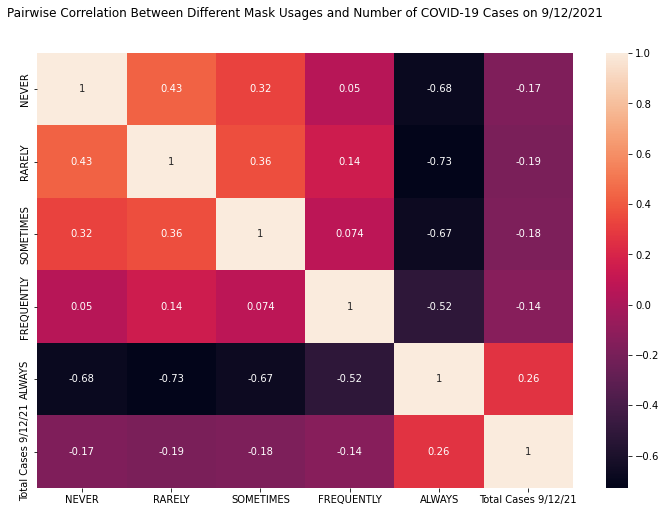

In [48]:
temp5a = county_data.loc[:, "NEVER": "ALWAYS"]
temp5a["Total Cases 9/12/21"] = county_data["9/12/21"]
plt.figure(figsize = (12,8))
q5a_plot = sns.heatmap(temp5a.corr(), annot=True)
q5a_plot = q5a_plot.set(title = "Pairwise Correlation Between Different Mask Usages and Number of COVID-19 Cases on 9/12/2021\n\n")

<!-- END QUESTION -->

### Question 5b

Train a linear regression model to predict the number of COVID-19 cases using county-wise mask usage data for September 12, 2021. Evaluate your model's RMSE on a held-out validation set with 33% of the county-wise data. When possible, make sure to set `random_state = 42` when splitting your data into training and test sets.
<!--
BEGIN QUESTION
name: q5b
points: 5
-->

In [49]:
X_q5b = county_data[['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']]
y_q5b = county_data['9/12/21']

# Make sure to set random_state = 42 and test_size = 0.33!
X_q5b_train, X_q5b_test, y_q5b_train, y_q5b_test = train_test_split(X_q5b, y_q5b, test_size = 0.33, random_state = 42)
lr = LinearRegression().fit(X = X_q5b_train, y = y_q5b_train)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
train_rmse_cases = mean_squared_error(y_q5b_train, lr.predict(X_q5b_train), squared = False)
test_rmse_cases = mean_squared_error(y_q5b_test, lr.predict(X_q5b_test), squared = False)
train_rmse_cases, test_rmse_cases

(27834.430707426982, 62591.13087482178)

In [50]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 5c

Explain potential reasons the test set RMSE is much higher as compared to the training set RMSE.
<!--
BEGIN QUESTION
name: q5c
points: 3
manual: True
-->

There are several potential reasons why the test set RMSE is much higher. The first is that in general, the predictions are based on data the model has never seen before, and the model is fitted based on data that may be different. This creates an inherent risk of overfitting, which would mean we need to find better features. Additionally, the testing data set doesn't have as much data as the training, which potentially increases standard deviation by a significant amount. Finally, different counties have different populations, so using total cases as a response variable isn't the best decision; if 2 counties had wildly different population counts, then having the same total cases mean 2 very different things, which could create a lot of error.

<!-- END QUESTION -->

### Question 5d

Instead of predicting the number of COVID-19 cases, redo part (b) by predicting the number of cases per capita. Report the model's RMSE on the training and validation set.

Comment on the relationship between the training and test RMSE by predicting the number of cases per capita instead of the total number of cases.
<!--
BEGIN QUESTION
name: q5d
points: 3
-->

In [51]:
X_q5d = county_data[['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']]
y_q5d = county_data['9/12/21'] / county_data['POPESTIMATE2020']
X_q5d_train, X_q5d_test, y_q5d_train, y_q5d_test = train_test_split(X_q5d, y_q5d, test_size = 0.33, random_state = 42)

lr = LinearRegression().fit(X = X_q5d_train, y = y_q5d_train)
train_rmse_cpc = mean_squared_error(y_q5d_train, lr.predict(X_q5d_train), squared = False)
test_rmse_cpc = mean_squared_error(y_q5d_test, lr.predict(X_q5d_test), squared = False)

train_rmse_cpc, test_rmse_cpc

(0.03540985737823185, 0.038167903498916037)

In [52]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 5e

Visualize the model outputs from part (d) by plotting the predictions $\hat{y}$ versus the observations $y$. Comment on what the plot indicates about our linear model as a comment in the code cell.

<!--
BEGIN QUESTION
name: q5e
points: 3
manual: True
-->

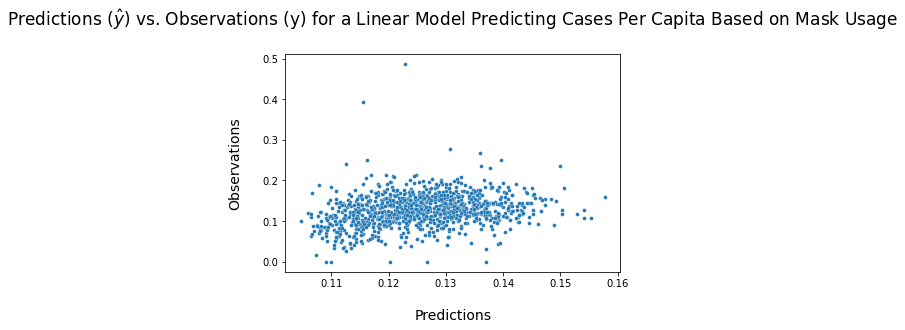

In [53]:
sns.scatterplot(x = lr.predict(X_q5d_test), y = y_q5d_test, s = 15)
plt.xlabel('\nPredictions', fontsize = 14)
plt.ylabel('Observations\n', fontsize = 14)
plt.title('Predictions ($\hat{y}$) vs. Observations (y) for a Linear Model Predicting Cases Per Capita Based on Mask Usage\n', fontsize = 17);

# This plot indicates that for our test data, there are times when our linear model isn't accurate when dealing with outliers. 
# Other than that, it appears that the predictions generally are in the same ballpark as observations, but there is a large spread that indicates we can find more features to improve the model.

<!-- END QUESTION -->

### Question 5f

We will investigate the bias and variance of this improved model on the test set using the bias-variance decomposition to formalize the behaviour of our model. To generate an empirical estimate of the errors and the parameters in the bias-variance decomposition, train 1000 bootstrapped models on the training dataset from part (d).

<!--
BEGIN QUESTION
name: q5f
points: 5
-->

In [54]:
models = []
training = pd.DataFrame(X_q5d_train)
training['y'] = y_q5d_train
for i in range(1000):
    new_table = training.sample(frac = 1, replace = True)
    one, two = new_table.iloc[:, 0:5], new_table.iloc[:, 5:]
    models.append(LinearRegression().fit(X = one, y = two))

In [55]:
grader.check("q5f")

q5f results: All test cases passed!

### Question 5g

To investigate the variance in our test predictions, we sample a particular test point $(x_i, y_i)$ such that $i = 100$. In other words, we will use the 100th point in the test set from part (d), `(X_q5d_test.iloc[100], y_q5d_test.iloc[100])` as the testing point.

Generate predictions and square errors for this test point for all 1000 models, and calculate the *proportion* of the *expected* square error that is captured by the model prediction variance. In other words, we wish to estimate the following quantity:

$$
\frac{\mathrm{Var}(f_\theta(x_i))}{\mathrm{E}_\theta[(y_i - f_\theta(x_i))^2]}
$$

*Hint*: Refer to the bias-variance decomposition from lecture.
<!--
BEGIN QUESTION
name: q5g
points: 5
-->

In [56]:
predicted_yvals, prediction_errors = [], []
test_x, test_y = [X_q5d_test.iloc[100]], y_q5d_test.iloc[100]
for model in models:
    predicted_y = model.predict(test_x)
    predicted_yvals.append(predicted_y[0])
    error = (test_y - predicted_y)**2
    prediction_errors.append(error[0])

q5g_var = np.var(predicted_yvals)
q5g_error = np.mean(prediction_errors)
prop_var = q5g_var / q5g_error
prop_var

0.0012996119342199377

In [57]:
grader.check("q5g")

q5g results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 5h

Using the bias-variance decomposition, comment on how much the variance of the model contributes to the error on the sample point above. We will extend this scenario to analyze the noise term in the bias-variance decomposition, specifically with regards to this COVID-19 dataset. Consider the following:

i) Assuming no observational noise (i.e. $\epsilon = 0$), what is the *magnitude* of the empirical model bias on this sample point?

ii) Clearly, there is a non-trivial amount of observational noise with COVID-19 case data simply due to how testing works and occurs. Please take a look at [this article](https://fivethirtyeight.com/features/coronavirus-case-counts-are-meaningless/) for more information. Given this infomation, explain the issues with the assumptions and result in 5h(i).

iii) Recall that we typically assume $y = g(x) + \epsilon$, where $\epsilon \sim \mathcal{N}(\mu, \sigma)$. In the theoretical setting for bias-variance, we have assumed $\mu = 0, \sigma > 0$. In this practical setting, analyze and determine how $\epsilon$ could be modeled (as a normal distribution, but you may also consider how it could be modeled as another distribution). Are there any immediate issues with the assumptions we have made in the theoretical setting where $\mu = 0, \sigma > 0$? What conditions on $\mu, \sigma$ could be more appropriate and why?

iv) Does the standard bias-variance decomposition presented in lecture hold given $\epsilon$ being normally distributed according to your answer in part (iii)? If so, please explain why. If not, explain why it does not hold and if possible, how to modify the bias-variance decomposition to make it hold (i.e. perhaps there is an additional noise term $E[\epsilon^3]$). 

*Hint*: Try to express $y = g(x) + \epsilon$ by adding and subtracting a certain quantity.

v) Intuitively, is it possible to minimize the true model bias to 0 given your $\epsilon$ formulation in part (iii)? Why or why not? Justify your answer using part (iv) if possible.

vi) Consider the infinite sample case where an oracle grants you as many samples as requested, and answer the same question in part (v). Is it possible to minimize the true model bias to 0 given your $\epsilon$ formulation in part (iii)? Conclude with an analysis of what our modeling task can approximate using $X\theta \approx y$ in the finite and infinite sample case.

<!--
BEGIN QUESTION
name: q5h
points: 24
manual: True
-->




##### Student Answer:

i) If there is no observational noise, then the magnitude of the empirical model bias on this sample point is equal to the square root of [error - variance] (after simplifying the formula $\text{error} = \text{observation variance} + \text{model bias}^2 + \text{model variance}$). Although some randomness may be involved, this value should be roughly around 0.04, as seen in the following cell - note that the real value of the bias can be either positive or negative since it is a square root.



In [58]:
# (i) of Q 5h:

model_bias = (q5g_error - q5g_var) ** 0.5
model_bias

0.04125193229594931

ii) There are a few issues with our assumptions of no observational noise. Because of different factors in how COVID interacts with governments and healthcare systems around the world, our model intrinsically doesn't account for arbitrary and unpredictable inconsistencies. For instance, the provided article conveys that the number of cases doesn't truly represent the state of COVID within a given geography; this is because higher cases could be due to either increased rates of cases per capita (a sign that conditions are worsing), or expanded testing capabilities (a good sign reflecting that the healthcare system is becoming less overwhelmed). On the other hand, false positives and false negatives, which occur more frequently with certain types of tests, also influence the gap between the amounts of positive tests and true cases.

iii) We most likely have negative bias, since the model underestimates how many cases there are due to lack of comprehensive testing, as per the article. Thus, when reflecting noise, we should have a negative $\mu$ to account for this, as the number of positive tests is less than the true value of COVID cases. $\sigma$ should remain the same, as there is no indication that it is different.

iv) If $\epsilon$ is normally distributed, then $\mathbb{E}(\epsilon)$ will be $\mu$, i.e. the mean noise. Following the logic of the proof at the link below, which is based on the proof presented in lecture, we can see that the standard bias-variance decomposition does indeed hold, as it remains true that $\text{model risk} = \text{observation variance} + \text{model bias}^2 + \text{model variance}$. However, as displayed in the top right of the proof, the model bias term is defined differently. Instead of $\text{model bias} = \mathbb{E}(\hat{Y}(x)) - g(x)$, the correct representation is now $\text{model bias} = \mathbb{E}(\hat{Y}(x)) - (g(x) + \mu) = \mathbb{E}(\hat{Y}(x)) - g(x) - \mu$ since E($\epsilon$) no longer equals zero. This distinction is important even though the general decomposition remains the same.

https://tinyurl.com/5h-part-iv


v) It isn't possible to minimize bias to 0 because, based on the answer to the previous part, the model bias term will always have a $\mu$ term that is a non-zero value, since $\epsilon$ is centered at a non-zero value now.

vi) In the infinite sample case, it may be more possible to model this noise, but we believe that it is still impossible; we will never know the "true" number of COVID cases, which is distinct from positive test results. There is no way to find the distinction between the two, even with infinite data. Models can likely only reliably predict positive test results, and not true cases, given different factors surrounding testing practices.

<!-- END QUESTION -->

### Question 5i

Using the bias-variance decomposition for each test point, calculate the average variance and average test mean-square error across the entire test set from part (d). In other words, estimate the following quantities:

$$
\frac{1}{n} \sum_i \mathrm{Var}(f_\theta(x_i))
$$

and

$$
\frac{1}{n} \sum_i \mathrm{E}_\theta[(y_i - f_\theta(x_i))^2]
$$

<!--
BEGIN QUESTION
name: q5i
points: 5
manual: False
-->

In [59]:
variances, avg_mses = [], []
for i in range(len(X_q5d_test)):
    predicted_yvals, prediction_errors = [], []
    test_x, test_y = [X_q5d_test.iloc[i]], y_q5d_test.iloc[i]
    for model in models:
        predicted_y = model.predict(test_x)
        predicted_yvals.append(predicted_y[0])
        error = (test_y - predicted_y)**2
        prediction_errors.append(error[0])
    variances.append(np.var(predicted_yvals))
    avg_mses.append(np.mean(prediction_errors))

avg_var = np.mean(variances)
avg_mse = np.mean(avg_mses) 


In [60]:
grader.check("q5i")

q5i results: All test cases passed!

<!-- BEGIN QUESTION -->

## Question 5j

Propose a solution to reducing the mean square error using the insights gained from the bias-variance decomposition above. What are the values of the quantities that have we estimated and what can be concluded about the remaining quantities? Please show all work that informs your analysis.

Assume that the standard bias-variance decomposition used in lecture can be applied here.
<!--
BEGIN QUESTION
name: q5j
points: 5
manual: True
-->

The mean squared error generally measures the average of the errors squared (difference between estimated values and original values). To reduce the mean squared error, we could attempt to reduce bias / variance by either increasing model complexity or even altering the features included in the model; it should be noted, however, that additional features or overly complex models could unintentionally increase variance as well, which may counteract the original intention of reducing bias and variance. Herein lies the bias-variance trade-off where bias can be easily reduced by increasing the variance, and vice versa, Simpler models (linear / logistic regression) tend to have higher bias and lower variance, while more complex models (e.g. random forest) generate lower bias but higher variance values. Overfitting here remains a risk since variance will increase, so features must be selected so as to reduce additional noise. K-fold cross-validation could be used here to determine the features that generate the lowest mean square error. Choosing a model configuration based on the generated values for bias and variance is key—k in k-nearest neighbors controls bias-variance tradeoffs (smaller values generate lower bias and higher variance whereas larger k values result in higher bias and lower variances).

The average mean squared error we generated came out to approximately 0.00146 while average variance using the bias-variance decomposition came out to 4.1272E-06, indicating that our models work relatively well when evaluating the entire test set from d).

<!-- END QUESTION -->



<br/><br/><br/>

---

<br/><br/><br/>

## Question 6: Open Supervised Modeling

We wish to extend our modeling framework from Question 5 to make it more accurate; in other words, we wish to predict $f(x)$, a supervised learning output, based on past and current quantities. 

This section will serve as a rough guide on creating an autoregressive modeling framework for predicting a COVID-19 quantity of your choice (i.e. deaths, cases, vaccinations).

Note that if you do not wish to pursue time-based modeling of COVID-19, you may skip parts (d), (e), and (f). That being said, you are strongly encouraged to incorporate time-based modeling into your open-ended modeling design since it constitutes a large component of the provided datasets.

We will ***not*** grade these below questions individually (i.e. there are no points explicitly assigned to questions 6(a) to 6(f)); they are simply guiding questions and will be graded as part of the final project report. You should make sure to answer all of the questions (that are applicable to your open-ended modeling) in some form in the report.

In [9]:
gather = pd.read_csv("data/gather.csv")
gather

def convert_time(df, columns):
    data = df.copy()

    if isinstance(columns, list):
        for col in columns:
            if not isinstance(data[col][0], pd.Timestamp):
                data[col] = data[col].dropna().astype(int).map(
                    pd.Timestamp.fromordinal)
    else:
        if not isinstance(data[columns][0], pd.Timestamp):
            data[columns] = data[columns].dropna().astype(int).map(
                pd.Timestamp.fromordinal)
    return data
edited = convert_time(gather, ["stay at home", ">50 gatherings", ">500 gatherings", "public schools", "restaurant dine-in", "entertainment/gym", "federal guidelines", "foreign travel ban"]).set_index("countyFIPS")
#

edited = edited[False == (edited["dem_to_rep_ratio"].isnull())]
edited = edited[(edited["dem_to_rep_ratio"] < 22) & (edited["dem_to_rep_ratio"] > 0.033558)]
edited[["stay at home", ">50 gatherings", ">500 gatherings", "public schools", "restaurant dine-in", "entertainment/gym", "foreign travel ban"]]

,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,foreign travel ban
countyFIPS,,,,,,,
1001.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-11
1003.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-11
1005.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-11
1007.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-11
1009.0,2020-04-04,2020-03-20,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-11
...,...,...,...,...,...,...,...
56041.0,2020-03-28,2020-03-20,2020-03-20,2020-03-20,2020-03-19,2020-03-19,2020-03-11
56043.0,2020-03-28,2020-03-20,2020-03-20,2020-03-20,2020-03-19,2020-03-19,2020-03-11
56045.0,2020-03-28,2020-03-20,2020-03-20,2020-03-20,2020-03-19,2020-03-19,2020-03-11


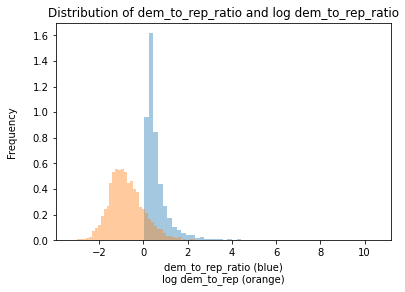

In [10]:
# histogram for dem_to_rep_ratio and log dem_to_rep_ratio
outcome_hist = sns.distplot(edited['dem_to_rep_ratio'] , kde = False, norm_hist = True)
log_dem_to_rep_ratio = np.log(edited['dem_to_rep_ratio'])
sns.distplot(log_dem_to_rep_ratio, kde = False, norm_hist = True)
plt.title("Distribution of dem_to_rep_ratio and log dem_to_rep_ratio")
plt.xlabel("dem_to_rep_ratio (blue)\nlog dem_to_rep (orange)")
plt.ylabel("Frequency\n");

<!-- BEGIN QUESTION -->

### Question 6a

Train a baseline model where $f$ is the model described in Question 0a and $x$ is a quantity of *your* choice. Note that you may used *any* supervised learning approach we have studied; you are not limited to a linear model.

<!--
BEGIN QUESTION
name: q6a
points: 0
manual: True
-->

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

q6a = pd.DataFrame(data = edited)


#the following arrays represent how many days after the foreign travel ban that x action took place


days_since_stay_temp = edited["stay at home"] - edited["foreign travel ban"]
days_since_stay_temp
days_since_stay = [days_since_stay_temp.loc[i].days for i in days_since_stay_temp.index]

days_since_50_temp = edited[">50 gatherings"] - edited["foreign travel ban"]
days_since_50 = [days_since_50_temp.loc[i].days for i in days_since_50_temp.index]

days_since_500_temp = edited[">500 gatherings"] - edited["foreign travel ban"]
days_since_500 = [days_since_500_temp.loc[i].days for i in days_since_500_temp.index]

days_since_school_temp = edited["public schools"] - edited["foreign travel ban"]
days_since_school = [days_since_school_temp.loc[i].days for i in days_since_school_temp.index]

days_since_food_temp = edited["restaurant dine-in"] - edited["foreign travel ban"]
days_since_food = [days_since_food_temp.loc[i].days for i in days_since_food_temp.index]

days_since_e_temp = edited["entertainment/gym"] - edited["foreign travel ban"]
days_since_e = [days_since_stay_temp.loc[i].days for i in days_since_e_temp.index]

In [12]:
# creating design matrix and further cleaning

X = pd.DataFrame()
X["stay at home"] = days_since_stay
X[">50 gatherings"] = days_since_50
X[">500 gatherings"] = days_since_500
X["public schools"] = days_since_school
X["restaurant dine-in"] = days_since_food
X["entertainment/gym"] = days_since_e
X["dem_to_rep_ratio"] = list(edited["dem_to_rep_ratio"])

X = X[False == (X["dem_to_rep_ratio"].isnull())]
y = np.log(X[["dem_to_rep_ratio"]])
X = X.drop(columns = ["dem_to_rep_ratio"])

for col in list(X):
    X[col] = X[col].fillna(X[col].max() + 1)

    
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model6a = LinearRegression().fit(X_train, y_train)
pred6a = model6a.predict(X_test)
rmse = (mean_squared_error(y_test, pred6a))**0.5
print("Initial Baseline RMSE: " + str(rmse))


Initial Baseline RMSE: 0.7462478636175799


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6b

Improve your model from part (a). Specify the supervised model you choose and write $f(x)$ as a function of the chosen features and parameters in your model. Justify why you chose these features and how you expect they will correlate with the output you wish to predict.

<!--
BEGIN QUESTION
name: q6b
points: 0
manual: True
-->

In [13]:
#improving multiple linear regression


most_recent_vax = vaccinations[vaccinations["Date"] == vaccinations.sort_values("Date", ascending = False)['Date'][17750]]
state_pops = county_data.groupby("STNAME").sum()[["POPESTIMATE2020"]].reset_index()
q6bmerged = most_recent_vax.merge(state_pops, left_on = "Province_State", right_on = "STNAME")
q6bmerged["Proportion Fully"] = q6bmerged["People_Fully_Vaccinated"]/q6bmerged["POPESTIMATE2020"]
q6bmerged["Proportion Partially"] = q6bmerged["People_Partially_Vaccinated"]/q6bmerged["POPESTIMATE2020"]

X6b = pd.DataFrame()

X6b["stay at home"] = days_since_stay
X6b[">50 gatherings"] = days_since_50
X6b[">500 gatherings"] = days_since_500
X6b["public schools"] = days_since_school
X6b["restaurant dine-in"] = days_since_food
X6b["entertainment/gym"] = days_since_e
X6b["dem_to_rep_ratio"] = list(edited["dem_to_rep_ratio"])
X6b["State FIPS"] = list(edited["STATEFP"])
X6b["County FIPS"] = list(edited["COUNTYFP"])
X6b["County FIPS"] = X6b["State FIPS"]*1000 + X6b["County FIPS"]

X6b = X6b[False == (X6b["dem_to_rep_ratio"].isnull())]
X6b = X6b[X6b["dem_to_rep_ratio"] < 22]
X6b = X6b.merge(q6bmerged[["FIPS", "Proportion Fully", "Proportion Partially"]], left_on = "State FIPS", right_on = "FIPS")
temp_mask_use = pd.DataFrame(data = mask_use)
temp_mask_use["COUNTYFP"] = [float(temp_mask_use["COUNTYFP"][i]) for i in temp_mask_use.index]
X6b = X6b.merge(temp_mask_use[["COUNTYFP", "NEVER", "ALWAYS"]], left_on = "County FIPS", right_on = "COUNTYFP")


X6b = X6b.sample(frac = 1, random_state = 44)
y6b = np.log(X6b["dem_to_rep_ratio"])
X6b = X6b.drop(columns = ["dem_to_rep_ratio", "State FIPS", "County FIPS", "FIPS", "COUNTYFP"])

for col in list(X6b):
    X6b[col] = X6b[col].fillna(X6b[col].max() + 1)

    
# train test split
X6b_train, X6b_test, y6b_train, y6b_test = train_test_split(X6b, y6b, test_size=0.1, random_state=42)

model6b = LinearRegression().fit(X6b_train, y6b_train)
pred6b = model6b.predict(X6b_test)
rmse6b = (mean_squared_error(y6b_test, pred6b))**0.5
print("Improved RMSE: " + str(rmse6b))


Improved RMSE: 0.5427378151345704


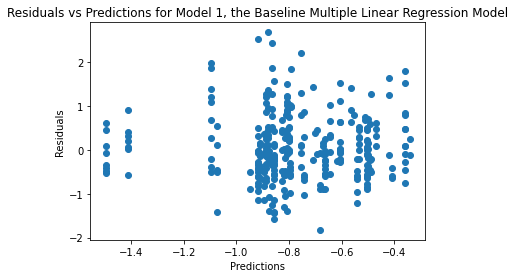

In [31]:
# scatter plot for model 1, predictions vs residuals
plt.scatter(x = pred6a, y = y_test-pred6a)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions for Model 1, the Baseline Multiple Linear Regression Model");

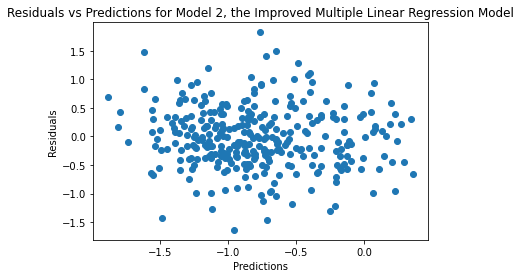

In [30]:
# scatter plot for model 2, predictions vs residuals
plt.scatter(x = pred6b, y = y6b_test-pred6b)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions for Model 2, the Improved Multiple Linear Regression Model");

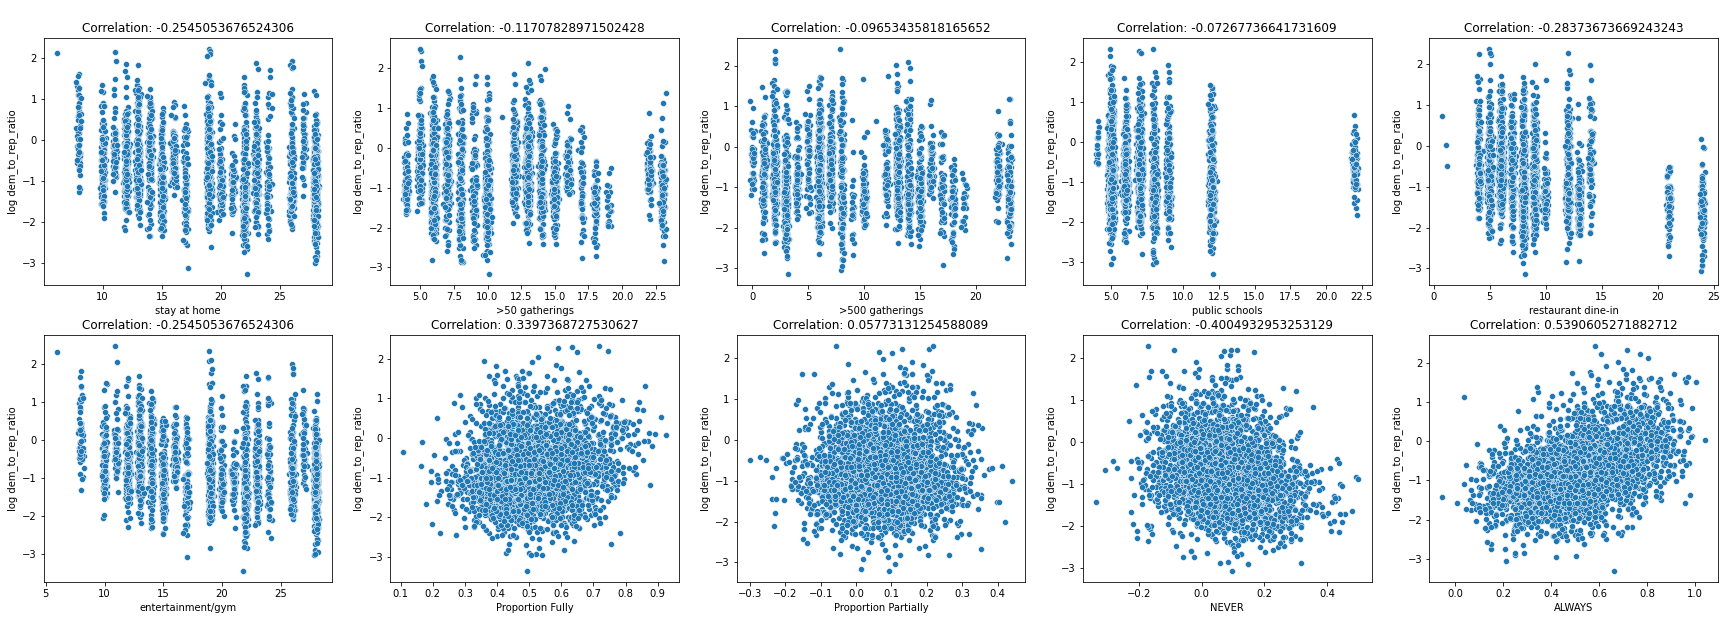

In [14]:
# correlations for multiple linear regression

fig, axes = plt.subplots(2,5, figsize = (30,10))
r = 0
c = 0
for i in list(X6b):
    
    jitx = X6b[i] + np.random.normal(0, 0.1, size = (len(X6b[i])))
    jity = y6b + np.random.normal(0, 0.1, size = (len(y6b)))
    
    
    sns.scatterplot(ax=axes[r,c], x = pd.Series(jitx), y = pd.Series(jity))
    axes[r,c].set_title("\nCorrelation: " + str(np.corrcoef(X6b[i], y6b)[0][1]))
    axes[r,c].set_ylabel("log dem_to_rep_ratio")
    
    c += 1
    if (c == 5):
        c = 0
        r += 1
    




In [15]:
# cleaner linear

lastX_train, lastX_test, lastY_train, lastY_test = train_test_split(X6b[["ALWAYS", "restaurant dine-in", "Proportion Fully", "NEVER"]], y6b, test_size=0.1, random_state = 42)
final = LinearRegression().fit(lastX_train, lastY_train)
finalpred = final.predict(lastX_test)
rmsefinal = (mean_squared_error(finalpred, lastY_test))**0.5
print("Final RMSE: " + str(rmsefinal))


Final RMSE: 0.557265767438431


In [68]:
# logistic

edited['log_demrep_ratio'] = np.log(edited['dem_to_rep_ratio'])

log_X = edited[['stay at home', '>50 gatherings',
                   '>500 gatherings', 'public schools', 'restaurant dine-in',
                   'entertainment/gym']]

log_X = pd.DataFrame()

log_X["stay at home"] = days_since_stay
log_X[">50 gatherings"] = days_since_50
log_X[">500 gatherings"] = days_since_500
log_X["public schools"] = days_since_school
log_X["restaurant dine-in"] = days_since_food
log_X["entertainment/gym"] = days_since_e

from sklearn.preprocessing import binarize
binary_demrep = edited['log_demrep_ratio'].values.reshape(1,-1)
x = binarize(binary_demrep) 
edited['log_demrep_ratio'] = np.ravel(binarize(binary_demrep.reshape(1,-1), 0.5))
for col in list(log_X):
    log_X[col] = log_X[col].fillna(log_X[col].max() + 1)

log_Y = pd.Series(edited['log_demrep_ratio'])
log_X_train, log_X_test, log_Y_train, log_Y_test = train_test_split(log_X, log_Y, test_size=0.1)
log_model = LogisticRegression()
log_X_train

log_model = log_model.fit(log_X_train, log_Y_train)
log_Y_pred = log_model.predict(log_X_train)
print('Logistic Regression Score: ', log_model.score(log_X_test, log_Y_test))

Logistic Regression Score:  0.9423076923076923


In [69]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()    
rf_model = rf.fit(log_X_train, log_Y_train)


predicted = pd.DataFrame(rf_model.predict(log_X_test))
probs = pd.DataFrame(rf_model.predict_proba(log_X_test))
from sklearn import metrics
from sklearn.model_selection import cross_val_score
rf_accuracy = metrics.accuracy_score(log_Y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(log_Y_test, probs[1])
rf_precision = metrics.precision_score(log_Y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(log_Y_test, predicted, pos_label=1)


# 10-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, log_X_test, log_Y_test, cv=10)


rf_cv_mean = np.mean(rf_cv_scores)
print('10-fold Cross Validated Score: ' + str(rf_cv_mean))

10-fold Cross Validated Score: 0.9327620967741936


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6c

If applicable, write an equation or rule for the prediction function $f(x)$; if this is infeasible, make sure to visualize your model parameters in some way. Interpret your improved model's optimal parameters (*hint*: refer to 1aiii), and compare these parameters to those of the baseline model. Comment on whether the parameters follow physical intuition given the nature of the prediction task.

For example, if you chose to use a decision tree, you may interpret the generated rules.
 
<!--
BEGIN QUESTION
name: q6c
points: 0
manual: True
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6d

Discuss your improved model's performance on both short-term and long-term time scales using a metric of your choice (*hint:* we're using an autoregressive model). In other words, given $x_t$, we wish to predict $\hat{x}_{t+k}$, and plot the error of these predictions for two $k$ values of your choice. You may use any reasonable interpretation of short-term and long-term predictions; an initial suggestion is to use 2-day predictions and 2-week predictions.

Compare the performance of this model on both timescales with the baseline model.

<!--
BEGIN QUESTION
name: q6d
points: 0
manual: True
-->

In [70]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6e

Plot and describe the error for both the baseline and improved models as a function of time. In other words, given $x_t$, we wish to predict $\hat{x}_{t+k}$, and plot the error of these predictions for all $k$.

Consider how and why the performance of the model degrades as a function of time using the rate of growth in the error.

<!--
BEGIN QUESTION
name: q6e
points: 0
manual: True
-->

In [71]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 6f

Consider a modification to the model $f(x) = x_{t+1}$ where instead $f(x) = [x_{t+1}, x_{t+2}, ..., x_{t+m}]$ for some $m > 1$. In other words, using the features $x$ that contain past and present quantities, our model *explicitly* predicts values for $m$ days in the future rather than simply the next day (i.e. $m = 1$). 

Train the baseline and improved model using $m = 5$ and $m = 10$. Evaluate and visualize the predictive accuracy of both models.

<!--
BEGIN QUESTION
name: q6f
points: 0
manual: True
-->

In [72]:
...

Ellipsis

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [73]:
grader.check_all()

q1a results: All test cases passed!

q1d results: All test cases passed!

q1e results: All test cases passed!

q5b results: All test cases passed!

q5d results: All test cases passed!

q5f results: All test cases passed!

q5g results: All test cases passed!

q5i results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [32]:
# Save your notebook first, then run this cell to export your submission.
grader.export()